# 线性回归
## 数学推导

![](./imgs/1_1.png)

![](./imgs/1_2.png)

## 编程实现

回归模型主体部分较为简单，关键在于如何在给出 mse（均方误差） 损失函数之后基于梯度下降的参数更新过程。

首先我们需要写出模型的主体和损失函数以及基于损失函数的参数求导结果，然后对参数进行初始化，最后写出基于梯度下降法的参数更新过程。

当然，我们也可以写出交叉验证来得到更加稳健的参数估计值。


In [7]:
"""
回归模型主体

numpy中的矩阵相乘
- np.multiply:元素级乘法
- np.matmul或np.dot:矩阵相乘

"""

import numpy as np

def linear_loss(X,y,w,b):
    num_train=X.shape[0] # 训练样本数
    num_feature=X.shape[1] # 单个样本维度

    # 模型公式
    y_hat=np.dot(X,w)+b

    # 损失函数
    loss=np.sum((y_hat-y)**2)/num_train

    # 参数的偏导
    dw=np.dot(X.T,(y_hat-y))/num_train
    db=np.sum((y_hat-y))/num_train

    return y_hat,loss,dw,db


In [8]:
"""
参数初始化
"""

def initialize_params(dims):
    w=np.zeros((dims,1))
    b=0
    return w,b

In [9]:
"""
基于梯度下降的模型训练过程
"""

def linear_train(X, y, learning_rate, epochs):
    w,b=initialize_params(X.shape[1]) # 样本特征数
    loss_list=[]

    for i in range(1,epochs):
        # 计算当前预测值、损失和参数偏导
        y_hat,loss,dw,db=linear_loss(X,y,w,b)  # 注意这种函数返回值方法
        loss_list.append(loss)

        # 基于梯度下降的参数更新过程
        w=w-learning_rate*dw
        b=b-learning_rate*db

        # 打印迭代次数和损失
        if i%10000 == 0:
            print(f'epoch: {i} loss: {loss}')


        # Python字典(dictionary),其中键值对由冒号分隔，每个键和值之间用逗号分隔。
        # 在这个例子中，w和b是字典的键，而w和b的值分别是变量w和b的值。
        # 保存参数
        params={'w':w,'b':b}

        # 保存梯度
        grads={'dw':dw,'db':db}

    return loss_list,loss,params,grads


In [1]:
"""
数据准备
- 以sklearn中的diabetes数据集为例
"""

from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

diabetes=load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
diabetes.data,diabetes.data.shape

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 (442, 10))

In [5]:
diabetes.target,diabetes.target.shape

(array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
         83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
        104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
        173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
        107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
         60., 174., 259., 178., 128., 

In [10]:
data=diabetes.data
target=diabetes.target

# 打乱数据
X,y=shuffle(data,target,random_state=13)
X=X.astype(np.float32)

# 训练集与测试集的简单划分
offset=int(X.shape[0] * 0.9)
X_train,y_train=X[:offset],y[:offset]
X_test,y_test=X[offset:],y[offset:]
y_train.shape,X_train.shape

((397,), (397, 10))

In [12]:
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))
y_train.shape,X_train.shape

((397, 1), (397, 10))

In [13]:
"""
执行训练
"""
loss_list,loss,params,grads=linear_train(
    X_train,
    y_train,
    learning_rate=0.001,
    epochs=100000
)


epoch: 10000 loss: 5533.040550284951
epoch: 20000 loss: 5217.583883518683
epoch: 30000 loss: 4949.678482446461
epoch: 40000 loss: 4721.506497122249
epoch: 50000 loss: 4526.570175705585
epoch: 60000 loss: 4359.467121410634
epoch: 70000 loss: 4215.703940136302
epoch: 80000 loss: 4091.5416831061716
epoch: 90000 loss: 3983.8676546491324


In [14]:
"""
查看训练得到的回归模型参数值
"""

params

{'w': array([[  44.07236054],
        [  -6.99862806],
        [ 157.06674066],
        [ 118.32851166],
        [  37.47927323],
        [  24.9769092 ],
        [-104.31188937],
        [ 104.03509035],
        [ 148.85488994],
        [  94.07049622]]),
 'b': 151.57222667066986}

In [15]:
"""
定义一个预测函数对测试集结果进行预测
"""
def predict(X,params):
    w=params['w']
    b=params['b']

    y_pred=np.dot(X,w)+b
    return y_pred

y_pred=predict(X_test,params)
y_pred[:5] # 展示前5个预测值

array([[132.02588998],
       [141.7741821 ],
       [150.48386535],
       [128.48606226],
       [147.29323713]])

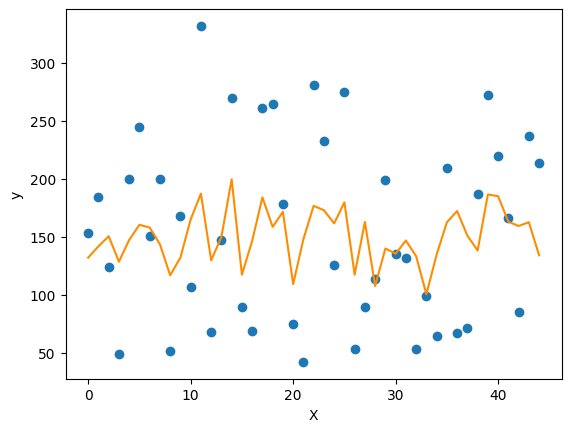

In [20]:
"""
利用matplotlib对预测结果和真值进行展示
"""

import matplotlib.pyplot as plt

f=X_test.dot(params['w'])+params['b']

plt.scatter(range(X_test.shape[0]),y_test)  # 散点图
# plt.plot(range(X_test.shape[0]),y_test)  # 折线图
plt.plot(f, color='darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

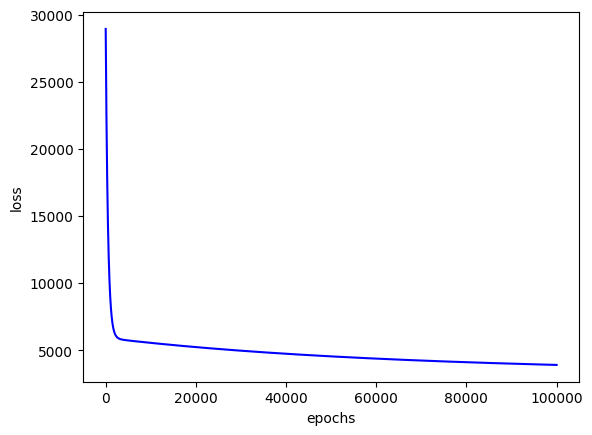

In [21]:
"""
训练过程中损失的下降
"""

plt.plot(loss_list,color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### 封装一个线性回归类

实现一个简单的class封装，其中加入自定义的交叉验证过程进行训练

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes

class LinearRegressionModel():
    def __int__(self):
        pass

    def prepare_data(self):
        data=load_diabetes().data
        target=load_diabetes().target
        X,y=shuffle(data,target,random_state=42)
        X=X.astype(np.float32)
        y=y.reshape((-1,1))
        # axis的值为0,这意味着要沿着第一个轴(即行)连接这些数组。
        # 如果将axis设置为负数，则沿着最后一个轴(即列)连接这些数组。
        data=np.concatenate((X,y),axis=1)
        return data

    def initialize_params(self,dims):
        w=np.zeros((dims,1))
        b=0
        return w,b

    def linear_loss(self,X,y,w,b):
        num_train=X.shape[0]
        num_feature=X.shape[1]

        y_hat=np.dot(X,w)+b
        loss = np.sum((y_hat-y)**2) / num_train
        dw = np.dot(X.T, (y_hat - y)) / num_train
        db = np.sum((y_hat - y)) / num_train
        return y_hat, loss, dw, db

    def linear_train(self, X, y, learning_rate, epochs):
        w, b = self.initialize_params(X.shape[1])
        for i in range(1, epochs):
            y_hat, loss, dw, db = self.linear_loss(X, y, w, b)
            w += -learning_rate * dw
            b += -learning_rate * db
            if i % 10000 == 0:
                print('epoch %d loss %f' % (i, loss))
            params = {
            'w': w,
            'b': b
            }
            grads = {
            'dw': dw,
            'db': db
            }
        return loss, params, grads

    def predict(self, X, params):
        w = params['w']
        b = params['b']
        y_pred = np.dot(X, w) + b
        return y_pred


    def linear_cross_validation(self, data, k, randomize=True):
        if randomize:
            data = list(data)
            shuffle(data)

        slices = [data[i::k] for i in range(k)]

        for i in range(k):
            validation = slices[i]
            train = [data
            for s in slices if s is not validation for data in s]
            train = np.array(train)
            validation = np.array(validation)
            yield train, validation

if __name__ == '__main__':
    lr = LinearRegressionModel()
    data = lr.prepare_data()
    for train, validation in lr.linear_cross_validation(data, 5):
        X_train = train[:, :10]
        y_train = train[:, -1].reshape((-1, 1))
        X_valid = validation[:, :10]
        y_valid = validation[:, -1].reshape((-1, 1))
        loss5 = []
        loss, params, grads = lr.linear_train(X_train, y_train, 0.001, 100000)
        loss5.append(loss)
        score = np.mean(loss5)
        print('five kold cross validation score is', score)
        y_pred = lr.predict(X_valid, params)
        valid_score = np.sum(((y_pred - y_valid) ** 2)) / len(X_valid)
        print('valid score is', valid_score)